# <font><b>第十四章 聚类方法 </b></font> P275 - P290…… 16

***

1、聚类是针对给定的样本，依据它们特征的相似度或距离，将其归并到若干个“类” 或 “簇” 的数据分析问题。一个类是样本的一个子集。

2、聚类的目的是通过得到的类或簇来发现数据的特点或对数据进行处理，在数据挖掘、模式识别等领域有着广泛的应用。



## **一、聚类的基本概率**

**聚类的核心概念是相似度（similarity）或距离（distance)。相似度直接影响聚类的结果，所以其选择是聚类的根本问题。**


聚类的对象是观测数据，或样本集合。假设有 $n$ 个样本，每个样本由 $m$ 个属性的特征向量组成。样本集合可以用矩阵 $X$ 表示：
#### $$X = [x_{ij}]_{m\times n} = \left[\begin{align}& x_{11} \quad & x_{12}\quad & \cdots & x_{1n}\\
                                                   & x_{21} \quad & x_{22}\quad & \cdots & x_{2n} \\
                                                   & \vdots \quad & \vdots\quad & \quad  & \vdots \\ 
                                                   & x_{m1} \quad & x_{m2}\quad & \cdots & x_{mn}  \end{align}\right]$$
矩阵 第 $j$ 列表示第 $j$ 个样本， $j=1,2,\cdots,n$; 第i行表示第 $i$个属性， $i=1,2,\cdots,m$； 矩阵元素 $x_{ij}$ 表示第 $j$ 个样本的第 $i$ 个属性值；



**定义（闵可夫斯基距离）** 给定样本集合 $X,Y$ 是 $m$ 维实数向量空间 $\mathcal {R^m}$ 中的点集合，其中 $x_i,x_j\in X, x_i = (x_{1i},x_{2i},\cdots,x_{mi})^T, x_j = (x_{1j},x_{2j},\cdots,x_{mj})^T$ , 样本 $x_i$ 与样本 $x_j$ 的 闵可夫斯基距离定义为
### $$ d_{ij} = \Big( \sum_{k=1}^m |x_{ki} - x_{kj}|^p\Big)^{\frac{1}{p}},\quad p\geq 1 \quad $$ 
#### $$ \Rightarrow \left\{\begin{align} &p=1, 曼哈顿距离(Manhattan distance):\quad&        & d_{ij} = \sum_{k=1}^m |x_{ki} - x_{kj}|  \\ 
                                    &p=2, 欧氏距离 (Euclidean distance):\quad&              & d_{ij} = \Big( \sum_{k=1}^m |x_{ki} - x_{kj}|^2\Big)^{\frac{1}{2}} \\  
                                    &p=\infty,切比雪夫距离（Chebyshev distance）\quad &      & d_{ij} = \max_k |x_{ki} - x_{kj}|,\quad 取各坐标数值差的绝对值的最大值\end{align}\right.$$
**闵可夫斯基距离越大相似度越小，距离越小相似度越大**

**定义（马哈拉诺比斯距离，简称马氏距离）**  马氏距离考虑各分量（特征）之间的相关性并与各个分量的尺度无关。

给定一个样本集合 $X, X = (x_{ij})_{m\times n}$, 其协方差矩阵记作 $S$。 样本 $x_i$ 与样本 $x_j$ 之间的马哈拉诺比距离 $d_{ij}$ 记作  
#### $$ d_{ij} = \big[(x_i - x_j)^T S^{-1} (x_i - x_j)\big]^{\frac{1}{2}}$$
其中，<font size=4> $x_i = (x_{1i}, x_{2i},\cdots, x_{mi})^T,\quad x_j = (x_{1j}, x_{2j},\cdots, x_{mj})^T$ </font>

当 $S$ 为单位矩阵时，即样本数据的各个分量相互独立且各个分量的方差为1时，马氏距离即欧氏距离。


**马哈拉诺比斯距离（马氏距离）距离越大相似度越小，距离越小相似度越大**



**定义（相关系数(correlation coeffcient)）** 样本之间的相似度也可以用相关系数来表示。 

样本 $ x_i, x_j$ 之间的相关系数定义为 
### $$ r_{ij} = \frac{\sum\limits_{k=1}^m (x_{ki} - \bar{x}_i)(x_{kj} - \bar{x}_j)}{\Big[ \sum\limits_{k=1}^m (x_{ki} - \bar{x}_i)^2 \sum\limits_{k=1}^m (x_{kj} - \bar{x}_j)^2\Big]^{\frac{1}{2}}}$$  
其中，<font size=4> $ \bar{x}_i = \frac{1}{m} \sum\limits_{k=1}^m x_{ki}$ </font> 为第 $ i$ 个样本的均值, <font size=4>  $ \bar{x}_j = \frac{1}{m} \sum\limits_{k=1}^m x_{kj}$ </font>  为第 $ j$ 个样本的均值

**相关系数绝对值越接近于1，表示样本越相似；越接近于0，表示样本越不相似**。

**定义（夹角余弦）** 样本之间的相似度也可以用夹角余弦（cosine)来表示。

样本 $ x_i, x_j$ 之间的夹角余弦定义为
### $$s_{ij} = \frac{\sum\limits_{k=1}^m x_{ki}x_{kj}}{\Big[ \sum\limits_{k=1}^m x_{ki}^2 \sum\limits_{k=1}^m x_{kj}^2 \Big]^\frac{1}{2}}$$ 
**夹角余弦越接近于1时，样本越相似；越接近于0时，样本越不相似。**

* 如果一个聚类方法假定一个样本只能属于一个类，或类的交集为空集，那么该方法称为**硬聚类（hard clustering) 方法**

* 如果一个样本可以属于多个类，或类的交集不为空集，那么该方法称为**软聚类（soft clistering）方法**

**定义（类或簇）** 设 $T$ 为给定的正数，若集合 $G$ 中任意两个样本 $x_i,x_j$ 有 $d_{ij}\leq T$， 则称 $G$ 为一个类或簇

**定义（类或簇）** 设 $T$ 为给定的正数，若对集合 $G$ 中任意一个样本 $x_i$, 一定存在 $G$ 中的另一个样本 $x_j$ ，使得 $d_{ij}\leq T$， 则称 $G$ 为一个类或簇

**定义（类或簇）** 设 $T$ 为给定的正数，若对集合 $G$ 中任意一个样本 $x_i$, $G$ 中的另一个样本 $x_j$ 满足 <font size=4> $\frac{1}{n_G -1}\sum\limits_{x_j\in G} d_{ij} \leq T$ </font>， 其中$n_G$ 为 $G$ 中的样本的个数，则称 $G$ 为一个类或簇 $$  

**定义（类或簇）** 设 $T,V$ 为给定的正数，如果集合 $G$ 中任意两个样本 $x_i,x_j$ 的距离 $d_{iij}$ 满足 
<font size=4> $\frac{1}{n_G(n_G -1)}\sum\limits_{x_i\in G}\sum\limits_{x_j\in G} d_{ij} \leq T \quad$ </font>，
<font size=4> $d_{ij}\leq V$ </font>， 则称 $G$ 为一个类或簇

**类的均值 <font size=4>$\bar{x}_G$</font>** ,又称类的中心 <font size=5>$\bar{x}_G = \frac{1}{n_G} \sum\limits_{i=1}^{n_G} x_i$</font>，其中$n_G$ 为 $G$ 中的样本的个数

**类的直径（diameter） <font size=4>$D_G$</font>** ： 类的直径 $D_G$ 是类中任意两个样本之间的最大距离，即<font size=4> $D_G = \max\limits_{x_i,x_j\in G} d_{ij}$</font>

**类的样本散布矩阵（scatter matrix）A_G**：<font size=4> $A_G = \sum\limits_{i=1}^{n_G}(x_i - \bar{x}_G)(x_i - \bar{x}_G)^T$ </font>

**样本协方差矩阵S_G** : <font size=4> $ S_G = \frac{1}{m-1}A_G = \frac{1}{m-1} \sum\limits_{i=1}^{n_G}(x_i - \bar{x}_G)(x_i - \bar{x}_G)^T$ </font>， 其中，m为样本的维数（样本的属性个数）

### **类与类之间的距离**

设类$G_p$ 包含 $n_p$ 个样本，类 $G_q$ 包含 $n_q$ 个样本，$\bar{x}_p, \bar{x}_q$ 分别为 $G_p,G_q$的均值，即类的中心，**定义类 $G_p,G_q$ 之间的距离 $D(p,q) $** 

(1) **最短距离或单连接（single linkage）** : <font size=4> $D_{pq} = min \{d_{ij} | x_i \in G_p,x_j \in G_q\}$ </font>

(2)  **最长距离或单连接（complete linkage）** : <font size=4> $D_{pq} = max \{d_{ij} | x_i \in G_p,x_j \in G_q\}$ </font>

(3)  **中心距离** : <font size=5> $D_{pq} = d_{\bar{x}_p \bar{x}_q}$ </font>

(4)  **平均距离** : <font size=5> $D_{pq} = \frac{1}{n_p n_q} \sum\limits_{x_i \in G_p} \sum\limits_{x_j \in G_q} d_{ij}$ </font>


## **二、层次聚类** 

* 层次聚类假设类别之间存在层次结构，将样本聚到层次化的类中。

* 层次聚类属于硬聚类，每一个样本只属于一个类。

* 层次聚类有聚合(agglomerative) 或 自下而上（bottom-up）聚类、分裂（divisive）或自上而下（top-down）聚类两种方法。


$\quad$<font size=3><b>   算法（聚合聚类算法）</b></font>

输入：$n$ 个样本组成的样本集合及样本之间的距离

输出：对样本集合的一个层次化聚类

（1）计算 $n$ 个样本两两之间的欧氏距离 $\{d_{ij}\}$, 记作矩阵 $D = [d_{ij}]_{n\times n}$

（2）构造 $n$ 个类，每个类只包含一个样本

（3）合并类间最小的两个类，其中最短距离为类间距离，构建一个新类。

（4）计算新类与当前各类的距离，若类的个数为 1，终止计算，否则 返回（3） 

## **三、k均值聚类** P283 - P287 5

* k均值聚类将样本划分为 $k$ 个子集，构成 $k$ 个类，将 $n$ 个样本分到 $k$ 个类中，**每个样本到其所属类的中心的距离最小。**

* $k$均值聚类是硬聚类。


$\quad$<font size=3><b>   算法（聚合聚类算法）</b></font>

输入：$n$ 个样本的集合 $X$

输出：样本集合聚类 $C$

（1）初始化。令 $t = 0$, 随机选择 $k$ 个样本点作为初始聚类中心 $m^{(0)} = (m_1^{(0)},\cdots,m_l^{(0)},\cdots,m_k^{(0)})$ 

（2）对样本进行聚类。对固定的类中心 $m^{(t)} =  (m_1^{(t)},\cdots,m_l^{(t)},\cdots,m_k^{(t)})$ ，其中 $m_l^{(t)}$ 为类 $G_l$ 的中心，计算每个样本到类中心的距离，将每个样本指派到与其最近的中心的类中，构成聚类结果 $C^{(t)}$

（3）计算新的类中心。对聚类结果 $C^{(t)}$， 计算当前各个类中的样本的均值，作为新的类中心 $m^{(t+1)} =  (m_1^{(t+1)},\cdots,m_l^{(t+1)},\cdots,m_k^{(t+1)})$ 

（4）如果迭代收敛或符合停止条件，输出 $C^* = C^{(t)}$, 否则令 $t = t+1$，返回（2）

***

<img src = "exp14.2.png" height=200 width = 400></img>

In [4]:
import numpy as np 

def cal_eulidean(x1,x2): # 计算欧氏距离
    return np.sqrt(np.sum( np.power(x1-x2,2) ))

In [5]:
import numpy as np

X = np.array([[0,0,1,5,5],[2,0,0,0,2]])

_K = 2 # k个聚类
_G = {} # 存储聚类结果: {0:[第0类的样本点],1:[第1类的样本点],...,k-1:[第k-1类的样本点]}
_xG = []  # 存储每个点对应的类别  例：[[0，2，0],[0，0，1]。。。] 最后一个值对应类别

_N = X.shape[1] # 样本点个数

# 初始化类中心  
_C = np.array(X[:,0:_K],dtype = np.float32) # 存储聚类中心点

# 初始化聚类结果集  _G = {0: [], 1: []}
for k in range(_K):
    if k not in _G.keys():
        _G[k] = []


continue_Flag = True # 是否结束循环标志 若没有样本点需要再改变类别，则该值置为False 循环结束

while continue_Flag:
    
    continue_Flag_cnt = 0 # 计数器，计算该循环中，有多少点归到新的类中
    
    # step2: 统计每个样本点距离类中心的距离，距离最近的类为该样本点所在类    
    # dist = [] # 计算每个样本点与 类中心的距离 N行，K列
    
    for n in range(_N): 
        x = X[:,n]
        temp_dist = [cal_eulidean(x,_C[:,k]) for k in range(_K)] # 计算样本点x 与 类中心_C中，每个类心的距离        
        min_dist_index = temp_dist.index(np.min(temp_dist)) # 找出距离最短的类别
        
        ## 更新 聚类结果 _G,_xG
        if len(_xG)<_N: ## 全部的样本点还没有全存入xG中(取第一次聚类)
            temp = list(x)
            temp.append(min_dist_index)
            
            _xG.append(temp) # 直接更新样本结果集 xG
            _G[min_dist_index].append(list(x)) # 直接更新聚类结果集
            
            continue_Flag_cnt += 1 # 计数器加1    
            
            print("check1:","n:",n,"continue_cnt:",continue_Flag_cnt,"X:",X,_xG[n][2] )
            
        elif _xG[n][2] != min_dist_index :  # 如果当前聚类的结果跟之前的不一样，更新数据
            
            last_cluster = _xG[n][2]
            
            # _G 中，把样本点x从原始分类中去掉，再归到新的分类中 
            _G[last_cluster].remove(list(x))       
            _G[min_dist_index].append(list(x))
            
            # _xG中，直接更新样本n的对应类别
            _xG[n][2] = min_dist_index
            
            continue_Flag_cnt += 1 
            
            print("check2:","n:",n,"continue_cnt:",continue_Flag_cnt)

    ## step3: 重新计算类中心 _C
    for k in range(_K):
        _C[:,k] = np.cumsum(_G[k],0)[-1] / len(_G[k])
    
    print("新的类中心点：",_C)
            
    # step4: 判断是否结束循环 结束循环条件：没有样本点需要再移动 
    if continue_Flag_cnt == 0:        
        print("xG:",_xG,"G:",_G)
        continue_Flag = False 
        
    print("本次循环","continue_cnt:",continue_Flag_cnt,"continue_Flag:",continue_Flag,"X:",X)
        
        

check1: n: 0 continue_cnt: 1 X: [[0 0 1 5 5]
 [2 0 0 0 2]] 0
check1: n: 1 continue_cnt: 2 X: [[0 0 1 5 5]
 [2 0 0 0 2]] 1
check1: n: 2 continue_cnt: 3 X: [[0 0 1 5 5]
 [2 0 0 0 2]] 1
check1: n: 3 continue_cnt: 4 X: [[0 0 1 5 5]
 [2 0 0 0 2]] 1
check1: n: 4 continue_cnt: 5 X: [[0 0 1 5 5]
 [2 0 0 0 2]] 0
新的类中心点： [[2.5 2. ]
 [2.  0. ]]
本次循环 continue_cnt: 5 continue_Flag: True X: [[0 0 1 5 5]
 [2 0 0 0 2]]
新的类中心点： [[2.5 2. ]
 [2.  0. ]]
xG: [[0, 2, 0], [0, 0, 1], [1, 0, 1], [5, 0, 1], [5, 2, 0]] G: {0: [[0, 2], [5, 2]], 1: [[0, 0], [1, 0], [5, 0]]}
本次循环 continue_cnt: 0 continue_Flag: False X: [[0 0 1 5 5]
 [2 0 0 0 2]]


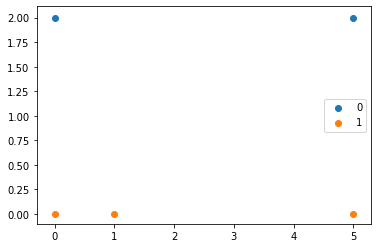

In [6]:
# 画图 
import matplotlib.pyplot as plt 

for key in _G.keys():
    val = _G[key]
    
    x = [v[0] for v in val]
    y = [v[1] for v in  val]
    plt.scatter(x,y,label = key)
    
plt.legend()


#### **K均值聚类的特点：**

（1）**总体特点** k均值聚类是基于划分的聚类方法：类别数 k 事先指定；以欧氏距离平方表示样本之间的距离，以中心或样本均值表示类别；

（2）**收敛性** k均值聚类属于启发式方法，不能保证收敛到全局最优，**初始中心的选择会直接影响聚类的结果**

（3）**初始类的选择** 选择不同的初始类，会得到不同的聚类结果。初始中心的选择，可以用层次聚类对样本进行聚类，得到 k 个类时停止。然后从每个类中选取一个与中心距离最近的点。

（4）**类别数 k 的选择** k均值聚类中类别数k值需要预先指定，而在实际应用中最优的k值是不知道的。解决这一问题的一个方法是尝试不同的k值聚类，检验各自得到聚类结果的质量，推测最优k值。**聚类结果的质量可以用类的平均直径来衡量。** 一般，类别数变小时，平均直径会增加；类别变大或超过某个值后，平均直径会不变；而这个值，正是最优的k值。
